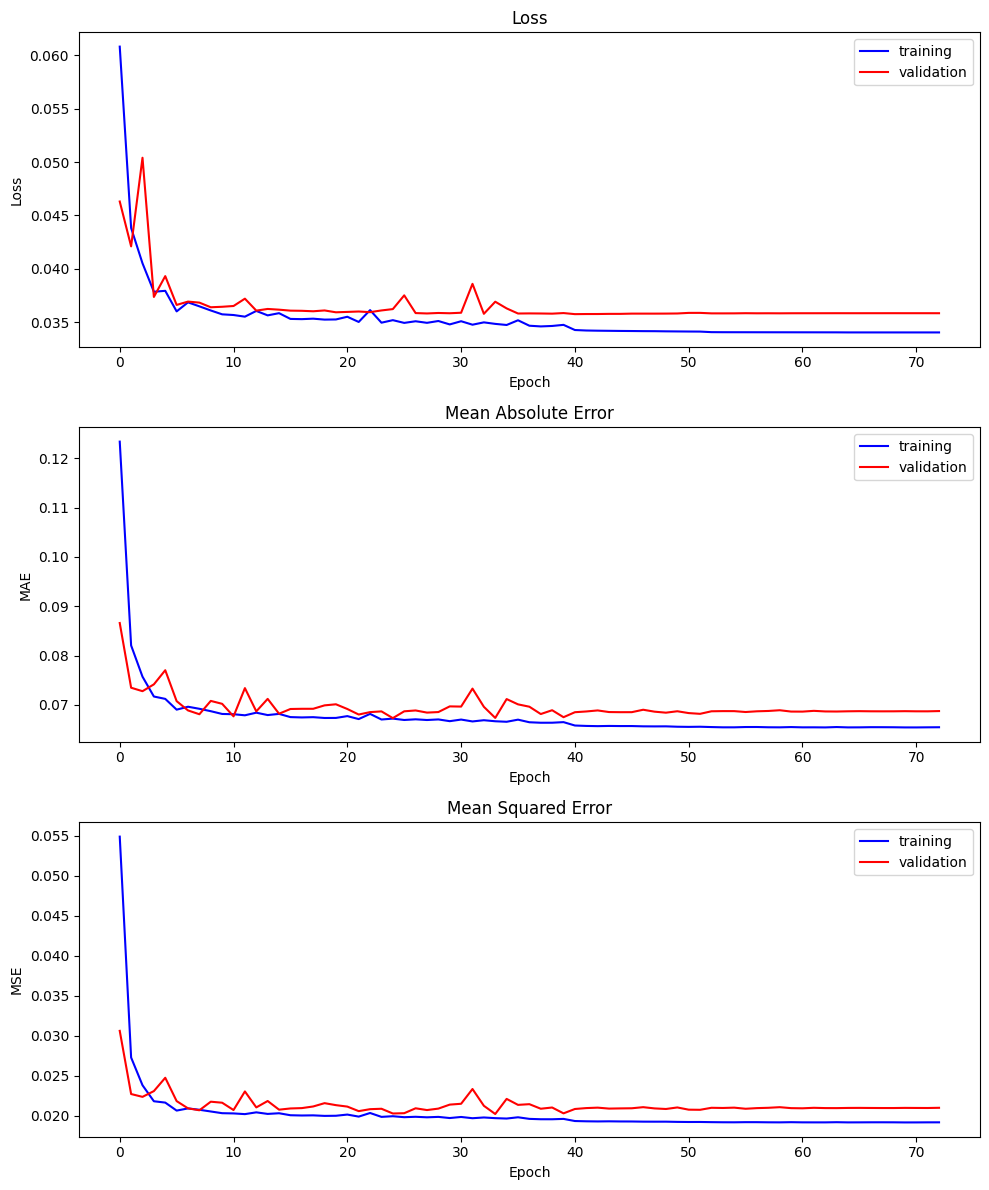

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_training_metrics(csv_path):
    """
    Reads a CSV file with training history and plots:
    1) loss
    2) mean absolute error
    3) mean squared error
    Each as a 3×1 subplot, including validation curves.
    """
    color1 = 'blue'
    color2 = 'red'
    
    # Read the CSV
    df = pd.read_csv(csv_path, sep=",", skipinitialspace=True)
    df.columns = df.columns.str.strip()

    # Create a 3×1 subplot figure
    fig, axes = plt.subplots(3, 1, figsize=(10, 12))

    # 1) Loss
    axes[0].plot(df['epoch'], df['loss'],  color=color1, label='training')
    axes[0].plot(df['epoch'], df['val_loss'], color=color2, label='validation')
    axes[0].set_title('Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    # 2) Mean Absolute Error
    axes[1].plot(df['epoch'], df['mean_absolute_error'],  color=color1, label='training')
    axes[1].plot(df['epoch'], df['val_mean_absolute_error'], color=color2, label='validation')
    axes[1].set_title('Mean Absolute Error')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('MAE')
    axes[1].legend()

    # 3) Mean Squared Error
    axes[2].plot(df['epoch'], df['mean_squared_error'],  color=color1, label='training')
    axes[2].plot(df['epoch'], df['val_mean_squared_error'], color=color2, label='validation')
    axes[2].set_title('Mean Squared Error')
    axes[2].set_xlabel('Epoch')
    axes[2].set_ylabel('MSE')
    axes[2].legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Replace 'metrics.csv' with the path to your CSV file as needed
    plot_training_metrics("p02a_hp-b32-r7e4-wmae_e01_m01_b13_logs.csv")


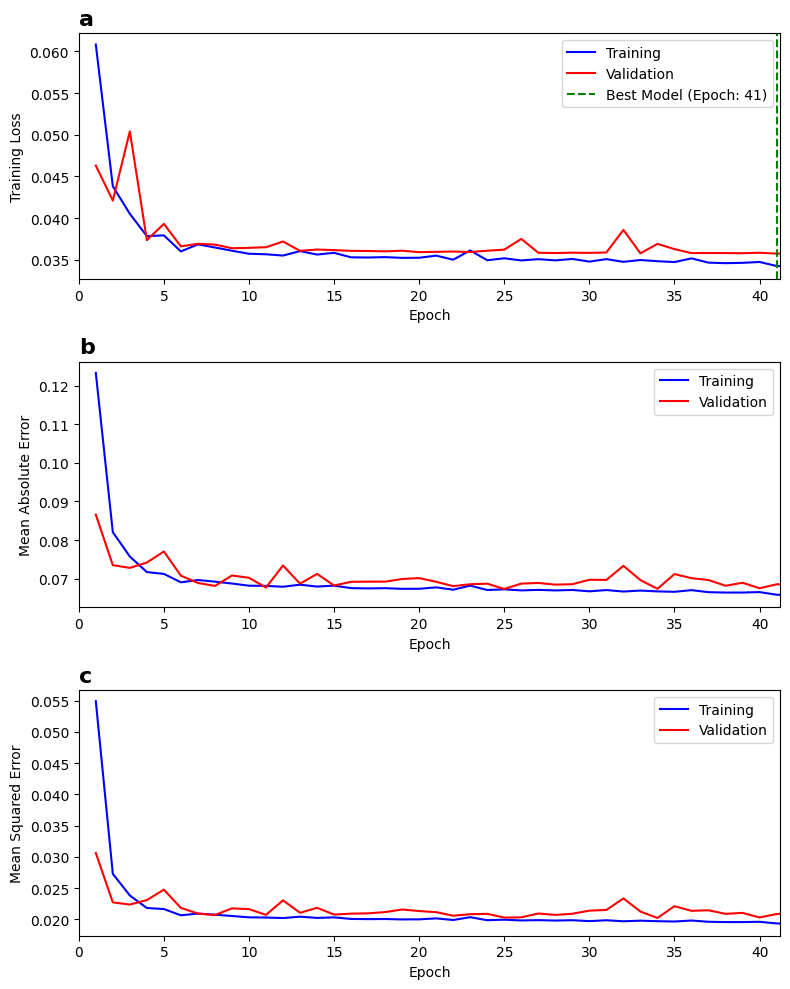

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_training_metrics(csv_path):
    """
    Reads a CSV file with training history and plots:
    1) loss
    2) mean absolute error
    3) mean squared error
    Each as a 3×1 subplot, including validation curves.
    Marks best epoch (min val_loss) on the loss subplot.
    """
    color1 = 'blue'
    color2 = 'red'
    best_line_color = 'green'

    # Read the CSV
    df = pd.read_csv(csv_path, sep=",", skipinitialspace=True)
    df.columns = df.columns.str.strip()

    # Determine best epoch (minimum validation loss)
    best_idx = df['val_loss'].idxmin()
    best_epoch = int(df.loc[best_idx, 'epoch']) + 1
    
    # Create a 3×1 subplot figure
    fig, axes = plt.subplots(3, 1, figsize=(8, 10))

    epoch = df['epoch'] + 1
    xlimit = best_epoch + 0.2
    # 1) Loss
    axes[0].plot(epoch, df['loss'],  color=color1, label='Training')
    axes[0].plot(epoch, df['val_loss'], color=color2, label='Validation')
    axes[0].axvline(best_epoch, color=best_line_color, linestyle='--', 
                    label=f'Best Model (Epoch: {best_epoch})')
    axes[0].set_title('a', fontsize=16, fontweight='semibold', loc='left')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Training Loss')
    axes[0].legend()
    axes[0].set_xlim(0, xlimit)

    # 2) Mean Absolute Error
    axes[1].plot(epoch, df['mean_absolute_error'],  color=color1, label='Training')
    axes[1].plot(epoch, df['val_mean_absolute_error'], color=color2, label='Validation')
    axes[1].set_title('b', fontsize=16, fontweight='semibold', loc='left')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Mean Absolute Error')
    axes[1].legend()
    axes[1].set_xlim(0, xlimit)

    # 3) Mean Squared Error
    axes[2].plot(epoch, df['mean_squared_error'],  color=color1, label='Training')
    axes[2].plot(epoch, df['val_mean_squared_error'], color=color2, label='Validation')
    axes[2].set_title('c', fontsize=16, fontweight='semibold', loc='left')
    axes[2].set_xlabel('Epoch')
    axes[2].set_ylabel('Mean Squared Error')
    axes[2].legend()
    axes[2].set_xlim(0, xlimit)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Replace with your actual CSV file path
    plot_training_metrics("p02a_hp-b32-r7e4-wmae_e01_m01_b13_logs.csv")


Saved plot to: p02a_hp-b32-r7e4-wmae_e01_m00_b13_traincurve.jpg
Saved plot to: p02a_hp-b32-r7e4-wmae_e01_m01_b13_traincurve.jpg
Saved plot to: p02a_hp-b32-r7e4-wmae_e01_m02_b13_traincurve.jpg
Saved plot to: p02a_hp-b32-r7e4-wmae_e01_m03_b13_traincurve.jpg
Saved plot to: p02a_hp-b32-r7e4-wmae_e01_m04_b13_traincurve.jpg
Saved plot to: p02a_hp-b32-r7e4-wmae_e01_m05_b13_traincurve.jpg


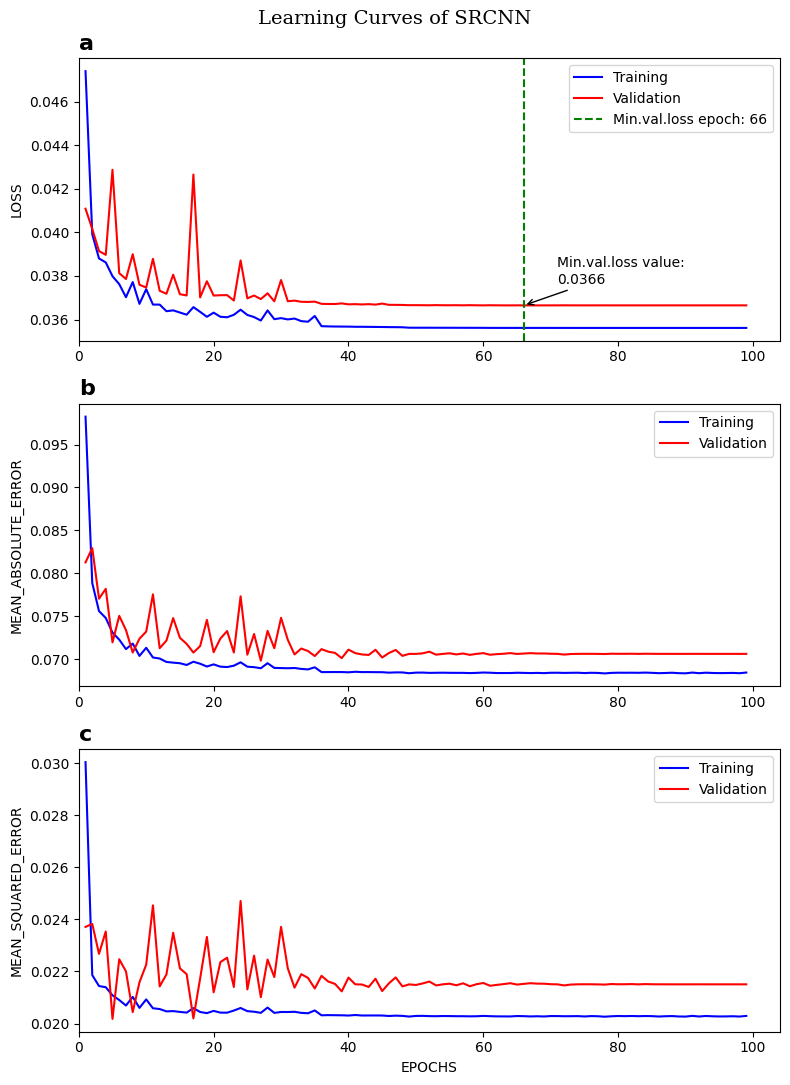

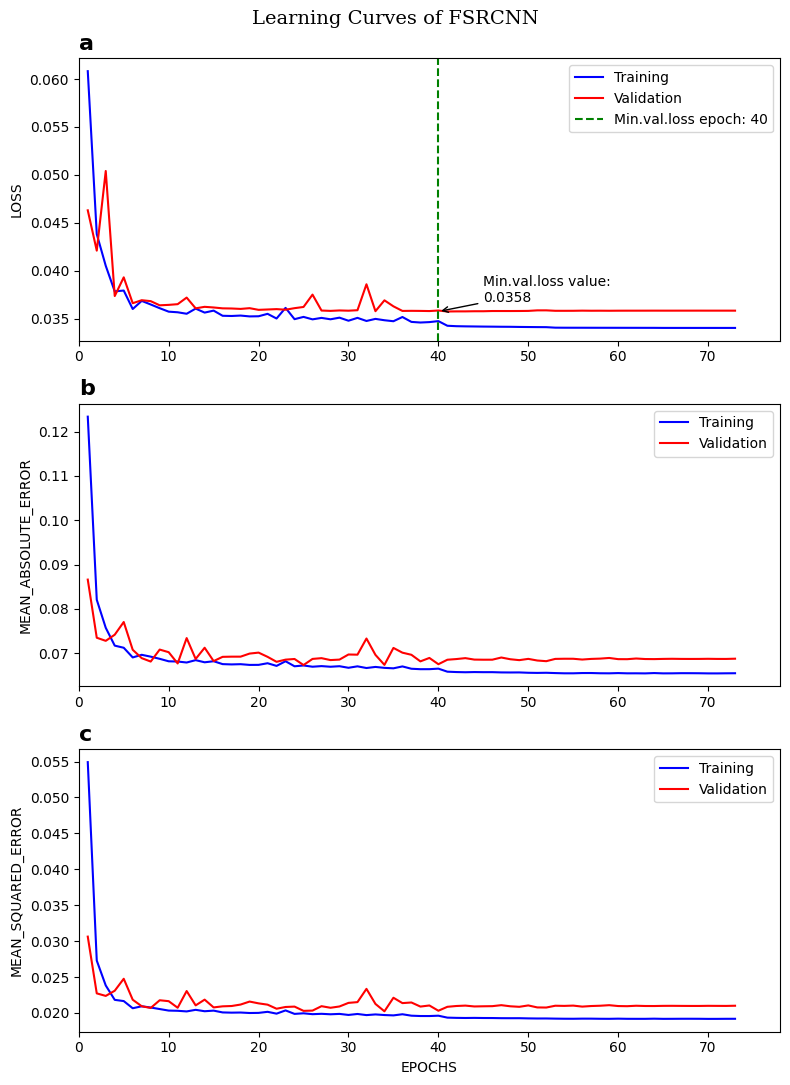

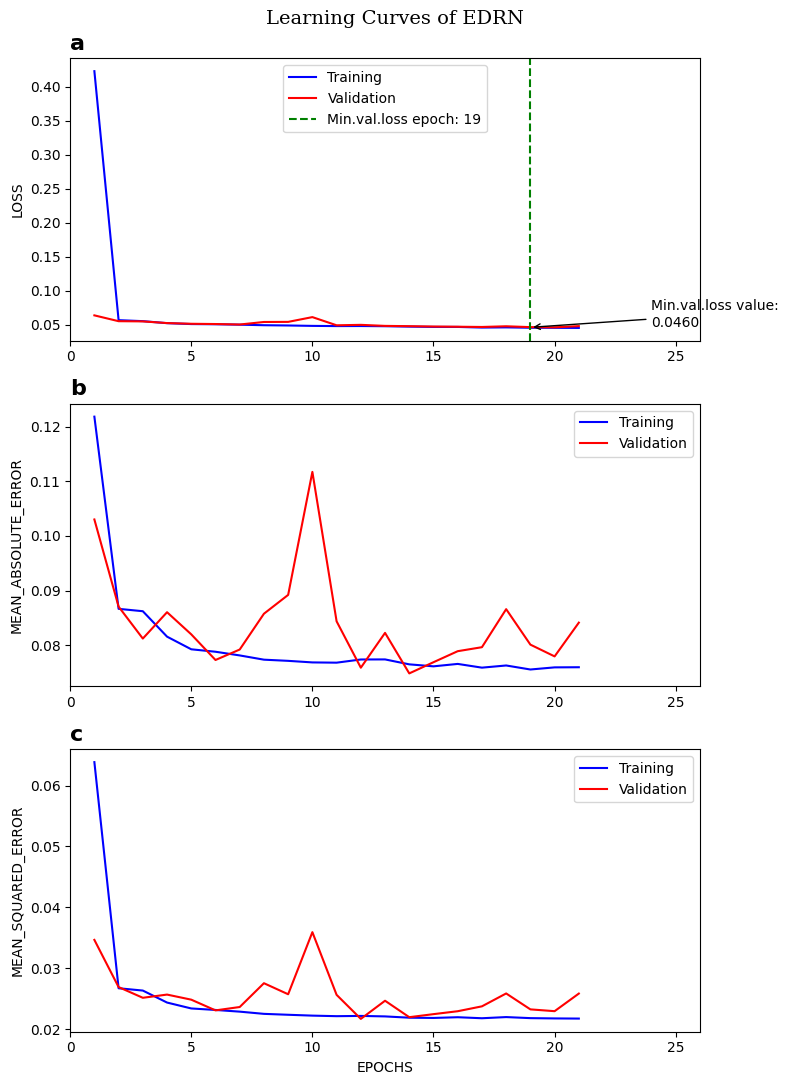

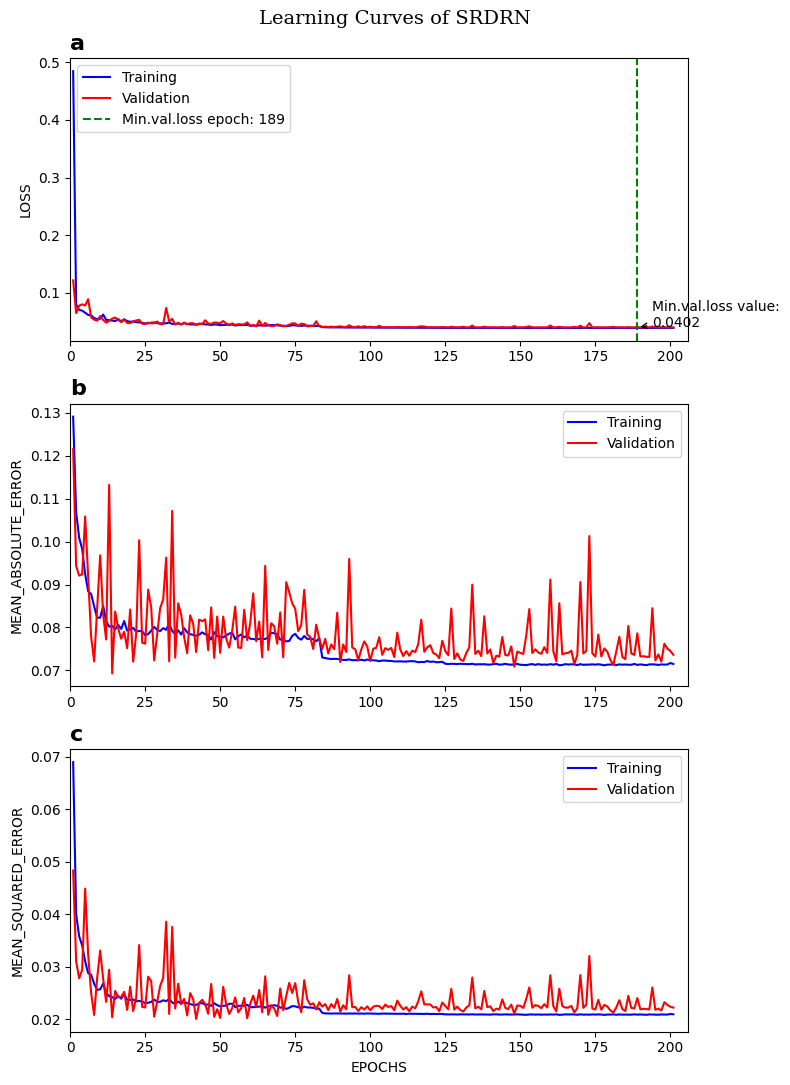

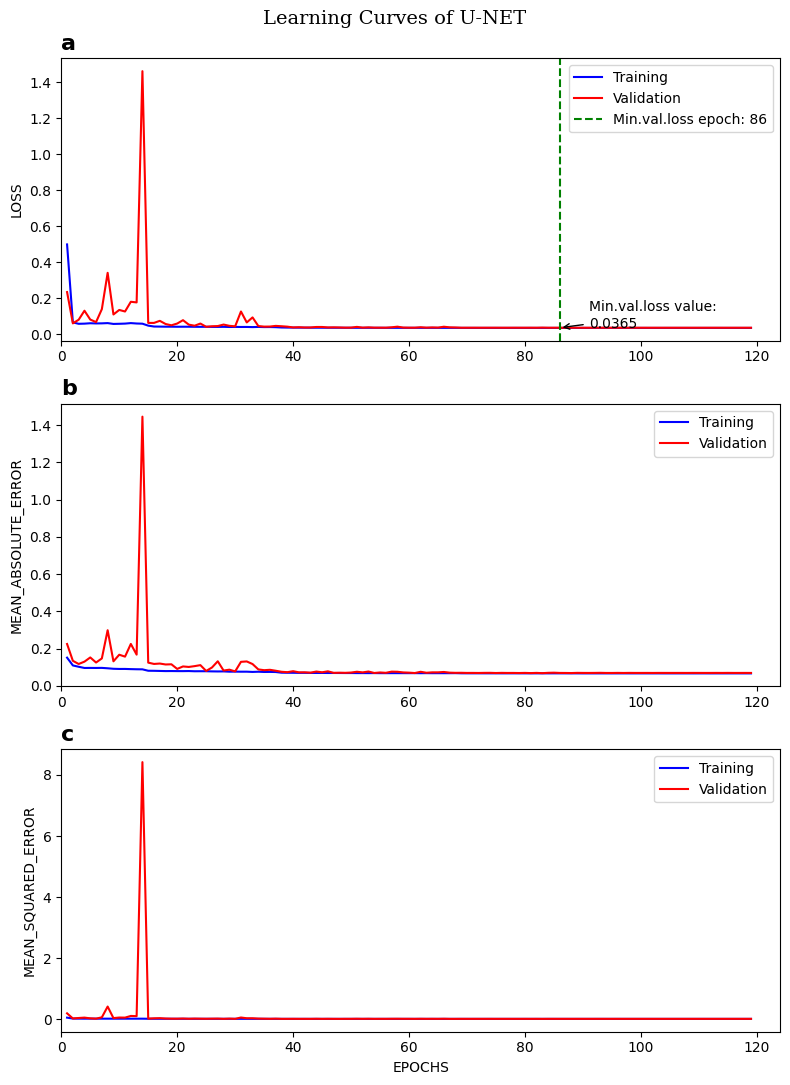

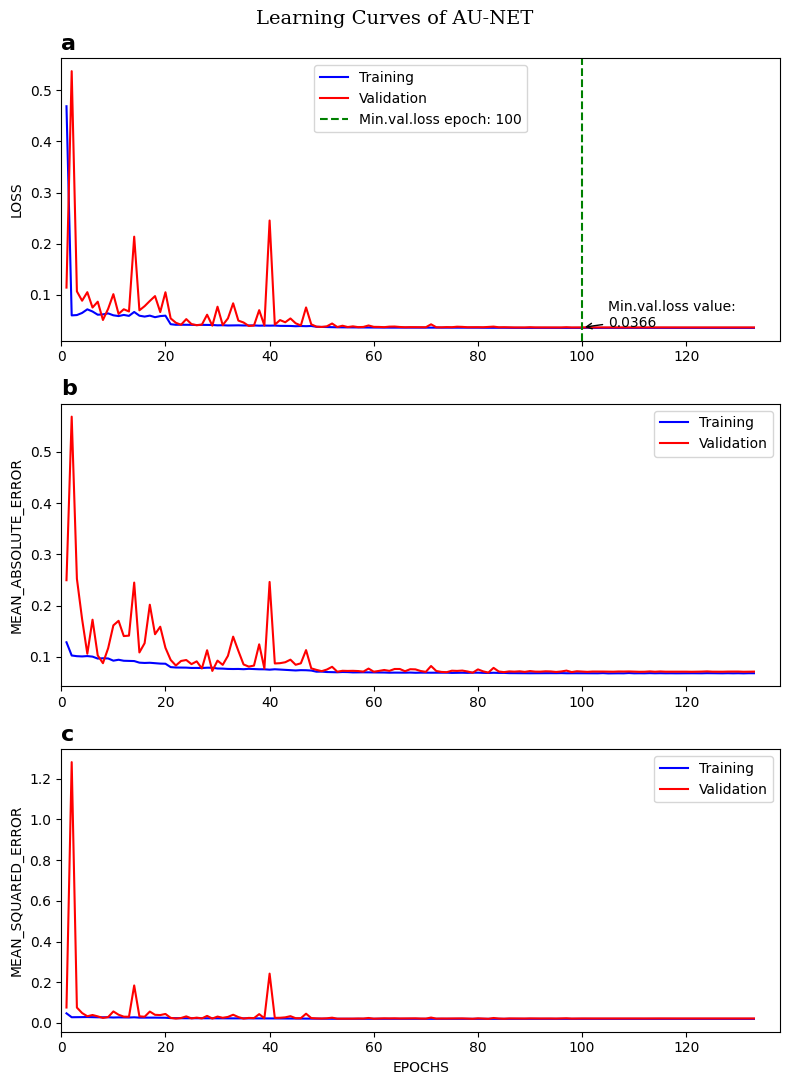

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_training_metrics(csv_path, dl_name, save=False):
    """
    Reads a CSV file with training history and plots:
    1) Loss
    2) Mean Absolute Error
    3) Mean Squared Error
    Each as a 3×1 subplot, including validation curves.
    Marks best epoch (min val_loss) on the loss subplot.
    """
    color1 = 'blue'
    color2 = 'red'
    best_line_color = 'green'

    # Read CSV
    df = pd.read_csv(csv_path, sep=",", skipinitialspace=True)
    df.columns = df.columns.str.strip()

    # Identify epoch column
    if 'epoch' in df.columns:
        epoch = df['epoch'] + 1
    else:
        epoch = df.index + 1
        df['epoch'] = epoch

    # Best validation loss
    best_idx = df['val_loss'].idxmin()
    best_epoch = int(df.loc[best_idx, 'epoch'])
    best_val_loss = df.loc[best_idx, 'val_loss']

    # Setup plot
    fig, axes = plt.subplots(3, 1, figsize=(8, 12))
    fig.suptitle(f"Learning Curves of {dl_name}", fontsize=14, fontweight='normal', fontfamily='serif', y=0.93)

    # Plot 1: Loss
    axes[0].plot(epoch, df['loss'], color=color1, label='Training')
    axes[0].plot(epoch, df['val_loss'], color=color2, label='Validation')
    axes[0].axvline(best_epoch, color=best_line_color, linestyle='--', label=f'Min.val.loss epoch: {best_epoch}')
    axes[0].annotate(f'Min.val.loss value:\n{best_val_loss:.4f}', 
                     xy=(best_epoch, best_val_loss), 
                     xytext=(best_epoch + 5, best_val_loss + 0.001),
                     arrowprops=dict(arrowstyle="->", color='k'),
                     fontsize=10)
    axes[0].set_title('a', fontsize=16, fontweight='semibold', loc='left')
    axes[0].set_ylabel('LOSS')
    axes[0].legend()
    axes[0].set_xlim(0, epoch.max() + 5)

    # Plot 2: Mean Absolute Error
    axes[1].plot(epoch, df['mean_absolute_error'], color=color1, label='Training')
    axes[1].plot(epoch, df['val_mean_absolute_error'], color=color2, label='Validation')
    axes[1].set_title('b', fontsize=16, fontweight='semibold', loc='left')
    axes[1].set_ylabel('MEAN_ABSOLUTE_ERROR')
    axes[1].legend()
    axes[1].set_xlim(0, epoch.max() + 5)

    # Plot 3: Mean Squared Error
    axes[2].plot(epoch, df['mean_squared_error'], color=color1, label='Training')
    axes[2].plot(epoch, df['val_mean_squared_error'], color=color2, label='Validation')
    axes[2].set_title('c', fontsize=16, fontweight='semibold', loc='left')
    axes[2].set_xlabel('EPOCHS')
    axes[2].set_ylabel('MEAN_SQUARED_ERROR')
    axes[2].legend()
    axes[2].set_xlim(0, epoch.max() + 5)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    if save:
        out_path = csv_path.replace('_logs.csv', '_traincurve.jpg')
        plt.savefig(out_path, dpi=300)
        print(f"Saved plot to: {out_path}")
    else:
        plt.show()

if __name__ == "__main__":
    # Run for a specific file

    # List of CSV files (update if necessary)
    log_files = [
        ("SRCNN", "p02a_hp-b32-r7e4-wmae_e01_m00_b13_logs.csv"),
        ("FSRCNN", "p02a_hp-b32-r7e4-wmae_e01_m01_b13_logs.csv"),
        ("EDRN", "p02a_hp-b32-r7e4-wmae_e01_m02_b13_logs.csv"),
        ("SRDRN", "p02a_hp-b32-r7e4-wmae_e01_m03_b13_logs.csv"),
        ("U-NET", "p02a_hp-b32-r7e4-wmae_e01_m04_b13_logs.csv"),
        ("AU-NET", "p02a_hp-b32-r7e4-wmae_e01_m05_b13_logs.csv"),
    ]
    for dl_name, csv_file in log_files:
        plot_training_metrics(csv_file, dl_name, save=True)


Saved plot to: p02a_hp-b32-r7e4-wmae_e01_m07_b13_traincurve.jpg
Saved plot to: p02a_hp-b32-r7e4-wmae_e01_m08_b13_traincurve.jpg


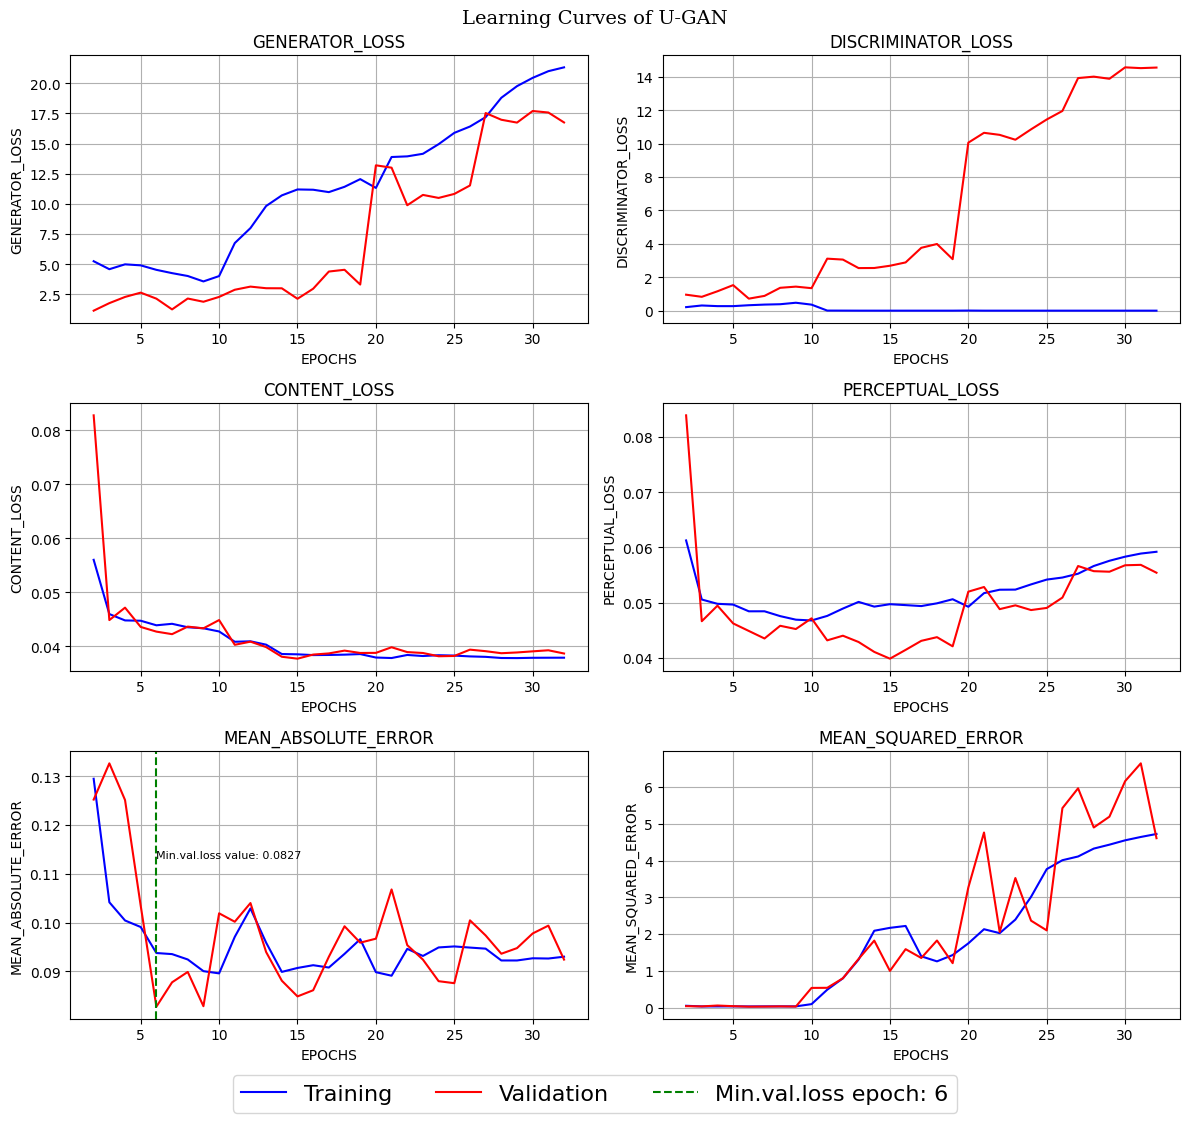

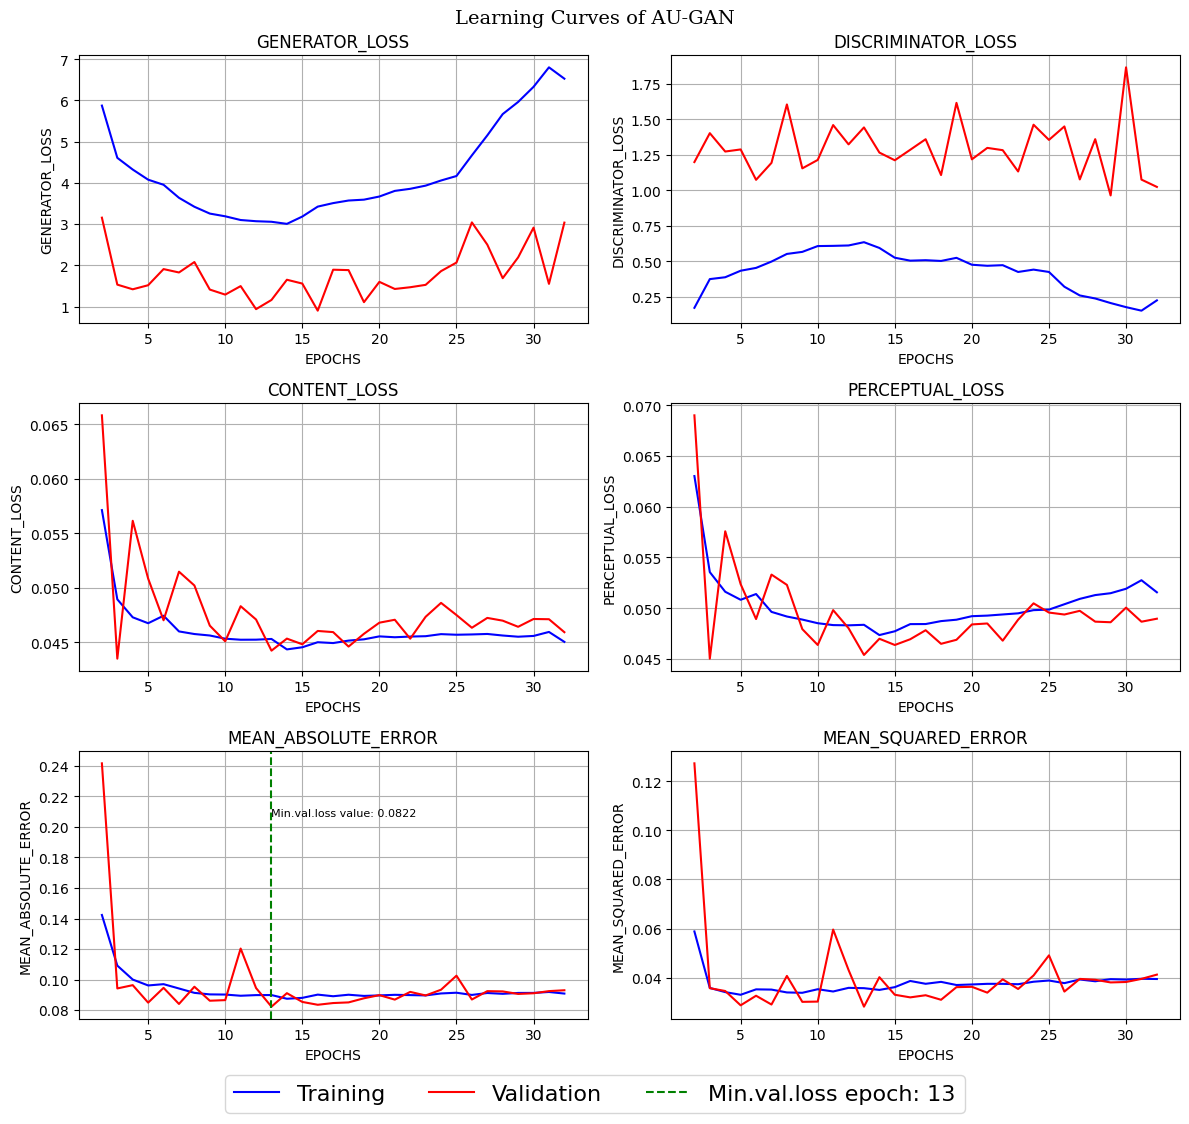

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_gan_training_metrics(csv_path, dl_name, save=False):
    """
    Plots 6 subplots from GAN training logs:
    1) Generator Loss
    2) Discriminator Loss
    3) Content Loss
    4) Perceptual Loss
    5) Mean Absolute Error
    6) Mean Squared Error
    Highlights minimum val_loss epoch for each.
    """
    color1 = 'blue'
    color2 = 'red'
    best_line_color = 'green'

    df = pd.read_csv(csv_path, sep=",", skipinitialspace=True)
    df.columns = df.columns.str.strip()

    if 'epoch' in df.columns:
        epoch = df['epoch'] + 1
    else:
        epoch = df.index + 1
        df['epoch'] = epoch

    metrics = [
        ("generator_loss", "GENERATOR_LOSS"),
        ("discriminator_loss", "DISCRIMINATOR_LOSS"),
        ("content_loss", "CONTENT_LOSS"),
        ("perceptual_loss", "PERCEPTUAL_LOSS"),
        ("mean_absolute_error", "MEAN_ABSOLUTE_ERROR"),
        ("mean_squared_error", "MEAN_SQUARED_ERROR"),
    ]

    fig, axes = plt.subplots(3, 2, figsize=(12, 12))
    fig.suptitle(f"Learning Curves of {dl_name}", fontsize=14, fontweight='normal', fontfamily='serif', y=0.93)

    for ax, (metric, title) in zip(axes.flatten(), metrics):
        val_metric = f"val_{metric}"
        if metric not in df.columns or val_metric not in df.columns:
            continue  # skip missing metrics

        best_idx = df[val_metric].idxmin()
        best_epoch = int(df.loc[best_idx + 1, 'epoch'])
        best_val = df.loc[best_idx, val_metric]

        ax.plot(epoch, df[metric], color=color1, label='Training')
        ax.plot(epoch, df[val_metric], color=color2, label='Validation')
        
        if metric=='mean_absolute_error':
            ax.axvline(best_epoch, color=best_line_color, linestyle='--', linewidth=1.5, label= f"Min.val.loss epoch: {best_epoch}")
            ax.text(best_epoch, ax.get_ylim()[1] * 0.85,
                    f"Min.val.loss value: {best_val:.4f}",
                    fontsize=8, verticalalignment='top')
        ax.set_title(title)
        ax.set_xlabel("EPOCHS")
        ax.set_ylabel(title)
        ax.grid(True)

    # Shared legend
    handles, labels = axes[2][0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=16)
    # handles, labels = axes[0][0].get_legend_handles_labels()
    # fig.legend(loc='lower center', ncol=3, fontsize=10)
    
    plt.tight_layout(rect=[0, 0.04, 1, 0.95])

    if save:
        out_path = csv_path.replace('_logs.csv', '_traincurve.jpg')
        plt.savefig(out_path, dpi=300)
        print(f"Saved plot to: {out_path}")
    else:
        plt.show()


if __name__ == "__main__":
    # GAN log files
    log_files = [
        ("U-GAN", "p02a_hp-b32-r7e4-wmae_e01_m07_b13_logs.csv"),
        ("AU-GAN", "p02a_hp-b32-r7e4-wmae_e01_m08_b13_logs.csv"),
    ]
    for dl_name, csv_file in log_files:
        plot_gan_training_metrics(csv_file, dl_name, save=True)


In [28]:
pwd

'/home/midhunm/NIMBUS/protem/midhun/AI4KLIM/EXPSDATA/P02A/COPY/csv_files'